Import Library

In [126]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [127]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [128]:
train = pd.read_excel('FIX.xlsx')

In [129]:
train[train['Hasil'] == 0]

,username,Tweet,Hasil
14,yusufmaulanaaap,timnas kalo udah unggul langsung ngedrop gitu performa nya,0
24,tribunSUPERBALL,Performa Rio Fahmi &amp; Bagas Kaffa yang tak meyakinkan membuat Indra Sjafri bisa terpaksa mendorong Fajar Fathurrahman ke belakang. Timnas U-22 Indonesia kini bakal menghadapi Vietnam di semifin...,0
36,Heidy94727749,"@registaco performa timnas ketika lawan tuan rumah kacau,...banyak skli terjadi salah pasing dan pelanggaran, hrs jd evaluasi apalagi Vietnam &amp;Thailand spesialis pressing ketat, bs kocar kacir...",0
38,danangiffah,"@heightgakena @PSSI Benar, mulai menurun performa timnas semoga bisa segera diperbaiki dan tetap fokus sampai juara",0
45,anamnyairoel,"Secara performa witan sulaiman ini under performance, entah alasan apa Indra Sjafri masih terus memainkannya? Apakah timnas tidak memiliki team utk statistik pemain??? #TimnasDay #SEAGames2023",0
46,UbaiBaiquni,@PSSI Sejauh ini performa Marcelino masih belum dapet tempat yg nyaman di timnas. \nKek syng banget kelebihannya belum terakomodir strategi coach IS.,0
48,liputan6dotcom,"Menang Telak atas Myanmar di SEA Games 2023, Indra Sjafri Belum 1 dengan Performa Timnas Indonesia U-22 https://t.co/NsiIU5u0d1",0
50,VIVAbola,"Performa Timnas Indonesia U-22 Menurun saat Hajar Timor Leste, Fajar Luar Biasa https://t.co/IBLnfZ0q34",0
57,CahyoAgustian3,@idextratime Dulu inget kata y pemain bola yg kena covid performa y bakal menurun.. ternyata cuma buat timnas Indonesia doang,0
62,IDNTimesSport,"Sudah Bantai 2 Tim, Performa Timnas U-22 Belum 1kan Indra Sjafri https://t.co/kKP2KH0aAR",0


In [130]:
train[train['Hasil'] == 1]

,username,Tweet,Hasil
0,erwinyokoyama,"Performa permainan Timnas ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ðŸ’ªðŸ»ðŸ‘ŠðŸ»",1
1,Yeowo6,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Timnas Bola Indonesia bisa menaikkan performa lagi dan nggk diremehin lawan.\n#TimnasDay https://t.co/NnF5vQsYTA,1
2,NarasiNewsroom,"Di tangan Indra Sjafri, timnas Indonesia berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu performa Indra Sjafri sebagai pelatih sejauh ...",1
3,DarmantoDiky,"@ID_Albiceleste @Indostransfer betul sih, performa squad timnas u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub",1
4,yourdreamteller,"Mantap Timnas, patut di acungi jempol, tapi Thailand bukan lawan yg bisa diremehkan, semoga performa timnas makin baik kedepannya ðŸ˜‡",1
...,...,...,...
199,lehon_mangolu,Dipilih sepak bola karena masih teras euforia Timnas U22 yang keluar sebagai juara di SEA Games 2023. #SemuaDukung # Subianto,1
200,republikaonline,Wapres mengapresiasi timnas U-22 di SEA Games. https://t.co/Pww6ziY6av,1
201,GilangEhsan,Kesuksesan timnas Indonesia meraih medali emas seagames 2023 menjadi titik awal dalam membangun empat tradisi baru di PSSI.\nGaruda Mendunia 2045 \n#BlueprintPSSI,1
202,OktoraJk007,Seagames sebagai.pemanasan Timnas untuk menuju the real Kompetition Piala Asia dan Piala Dunia..semoga permainan garuda muda tetap.konsisten skill makin teruji,1


In [131]:
train.shape

(204, 3)

Menghitung jumlah yang Puas dan Tidak Puas

In [132]:
train['Hasil'].value_counts()

Hasil
1    157
0     47
Name: count, dtype: int64

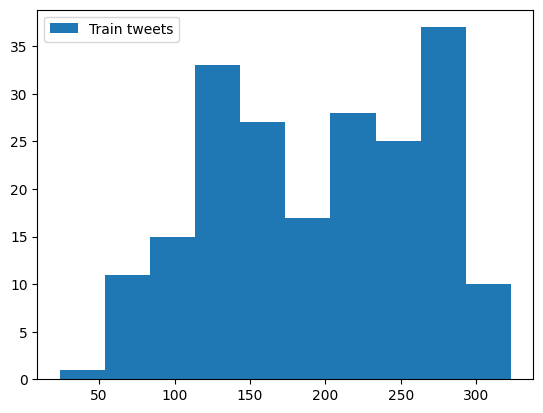

In [133]:
length_train_dataset = train['Tweet'].str.len()
plt.hist(length_train_dataset, label="Train tweets")
plt.legend() 
plt.show()

In [134]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
                        

In [135]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['Tweet'],"@[\w]*") 
train.head()

,username,Tweet,Hasil,tidy_tweet
0,erwinyokoyama,"Performa permainan Timnas ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ðŸ’ªðŸ»ðŸ‘ŠðŸ»",1,"Performa permainan Timnas ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ðŸ’ªðŸ»ðŸ‘ŠðŸ»"
1,Yeowo6,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Timnas Bola Indonesia bisa menaikkan performa lagi dan nggk diremehin lawan.\n#TimnasDay https://t.co/NnF5vQsYTA,1,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Timnas Bola Indonesia bisa menaikkan performa lagi dan nggk diremehin lawan.\n#TimnasDay https://t.co/NnF5vQsYTA
2,NarasiNewsroom,"Di tangan Indra Sjafri, timnas Indonesia berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu performa Indra Sjafri sebagai pelatih sejauh ...",1,"Di tangan Indra Sjafri, timnas Indonesia berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu performa Indra Sjafri sebagai pelatih sejauh ..."
3,DarmantoDiky,"@ID_Albiceleste @Indostransfer betul sih, performa squad timnas u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub",1,"betul sih, performa squad timnas u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub"
4,yourdreamteller,"Mantap Timnas, patut di acungi jempol, tapi Thailand bukan lawan yg bisa diremehkan, semoga performa timnas makin baik kedepannya ðŸ˜‡",1,"Mantap Timnas, patut di acungi jempol, tapi Thailand bukan lawan yg bisa diremehkan, semoga performa timnas makin baik kedepannya ðŸ˜‡"


In [136]:
def remove_links_mentions_keywords(text):
    # Definisikan pola link dan mention menggunakan ekspresi reguler
    pattern = r'(@\w+)|http\S+|www\S+'
    
    # Hapus link dan mention menggunakan fungsi re.sub() dan gantikan dengan string kosong
    text_without_links_mentions = re.sub(pattern, '', text)
    
    # Hapus kata-kata kunci menggunakan ekspresi reguler
    keywords = ['timnas', 'indonesia',  'main', 'indra', 'sjafri' , 'game','thailand','pemain','semuadukungprabowo', 'subianto', 'ðŸ','performa','timnasindonesia', 'masih', 'dengan', 'vietnam','manutjokowi', 'jokowi', 'prabowo', 'erick thohir']
    pattern_keywords = r'\b(?:{})\b'.format('|'.join(keywords))
    text_without_keywords = re.sub(pattern_keywords, '', text_without_links_mentions, flags=re.IGNORECASE)
    
    return text_without_keywords

# Terapkan fungsi remove_links_mentions_keywords pada kolom 'Tweet' dan simpan hasilnya dalam kolom 'tidy_tweet'
train['tidy_tweet'] = train['Tweet'].apply(remove_links_mentions_keywords)
train.head()

,username,Tweet,Hasil,tidy_tweet
0,erwinyokoyama,"Performa permainan Timnas ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ðŸ’ªðŸ»ðŸ‘ŠðŸ»",1,"permainan ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ’ªðŸ»‘ŠðŸ»"
1,Yeowo6,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Timnas Bola Indonesia bisa menaikkan performa lagi dan nggk diremehin lawan.\n#TimnasDay https://t.co/NnF5vQsYTA,1,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Bola bisa menaikkan lagi dan nggk diremehin lawan.\n#TimnasDay
2,NarasiNewsroom,"Di tangan Indra Sjafri, timnas Indonesia berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu performa Indra Sjafri sebagai pelatih sejauh ...",1,"Di tangan , berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu sebagai pelatih sejauh ini, nih?\n"
3,DarmantoDiky,"@ID_Albiceleste @Indostransfer betul sih, performa squad timnas u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub",1,"betul sih, squad u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub"
4,yourdreamteller,"Mantap Timnas, patut di acungi jempol, tapi Thailand bukan lawan yg bisa diremehkan, semoga performa timnas makin baik kedepannya ðŸ˜‡",1,"Mantap , patut di acungi jempol, tapi bukan lawan yg bisa diremehkan, semoga makin baik kedepannya ˜‡"


In [137]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
train.head(10)

,username,Tweet,Hasil,tidy_tweet
0,erwinyokoyama,"Performa permainan Timnas ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ðŸ’ªðŸ»ðŸ‘ŠðŸ»",1,"permainan ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ’ªðŸ»‘ŠðŸ»"
1,Yeowo6,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Timnas Bola Indonesia bisa menaikkan performa lagi dan nggk diremehin lawan.\n#TimnasDay https://t.co/NnF5vQsYTA,1,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Bola bisa menaikkan lagi dan nggk diremehin lawan.\n#TimnasDay
2,NarasiNewsroom,"Di tangan Indra Sjafri, timnas Indonesia berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu performa Indra Sjafri sebagai pelatih sejauh ...",1,"Di tangan , berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu sebagai pelatih sejauh ini, nih?\n"
3,DarmantoDiky,"@ID_Albiceleste @Indostransfer betul sih, performa squad timnas u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub",1,"betul sih, squad u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub"
4,yourdreamteller,"Mantap Timnas, patut di acungi jempol, tapi Thailand bukan lawan yg bisa diremehkan, semoga performa timnas makin baik kedepannya ðŸ˜‡",1,"Mantap , patut di acungi jempol, tapi bukan lawan yg bisa diremehkan, semoga makin baik kedepannya ˜‡"
5,Yananfield,@pahlevinho Tapi performa timnas thailand dan vietnam gak segarang biasanya ya bang?,1,Tapi dan gak segarang biasanya ya bang?
6,abi_sasaLL,"#TimnasDapatEmas setelah Penantian 32 tahun,di bawah \nkepemimpinan ketum PSSI @k , talenta terbaik timnas sepak bola Indonesia berhasil mencatatkan sejarah dengan menunjukan performa apik dalam p...",1,"#TimnasDapatEmas setelah Penantian 32 tahun,di bawah \nkepemimpinan ketum PSSI , talenta terbaik sepak bola berhasil mencatatkan sejarah menunjukan apik dalam pergelaranÂ SEA Games 2023\n#Gue..."
7,JohnpiterT,@PSSI Mhn kepada PSSI..\nAgar tetap menbina Timnas yg ada ini..\nKrn sdh bagus dan Tipe permainan nya..\nSdh sekelas..Eropa\nMhn di Jaga Performa nya\nBiar jgn kendur...\nMelihat permainan tadi ml...,1,Mhn kepada PSSI..\nAgar tetap menbina yg ada ini..\nKrn sdh bagus dan Tipe permainan nya..\nSdh sekelas..Eropa\nMhn di Jaga nya\nBiar jgn kendur...\nMelihat permainan tadi mlm...\nMinim kesalah...
8,MohArifWidarto,Final sepakbola yang penuh drama.\n\nTapi memang pada babak kedua performa timnas garuda menurun.\n\nHarapannya tentu saja timnas garuda bisa mempersembahkan medali emas.\n\n#SEAGames2023 \n#SEAGa...,1,Final sepakbola yang penuh drama.\n\nTapi memang pada babak kedua garuda menurun.\n\nHarapannya tentu saja garuda bisa mempersembahkan medali emas.\n\n#SEAGames2023 \n#SEAGames32
9,halimfuadi,"@iIhamzada Permainannya bagus banget, semoga kalo udah main di timnas senior bisa lebih bagus lagi karena biasanya performa menurun ketika umur di atas 24, padahal kalo di negara top global itu us...",1,"Permainannya bagus banget, semoga kalo udah di senior bisa lebih bagus lagi karena biasanya menurun ketika umur di atas 24, padahal kalo di negara top global itu usia emasnya , semoga nggak ke..."


Menghilangkan kata pendek

In [138]:
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4])) 

In [139]:
train.head()

,username,Tweet,Hasil,tidy_tweet
0,erwinyokoyama,"Performa permainan Timnas ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ðŸ’ªðŸ»ðŸ‘ŠðŸ»",1,"permainan Games sangat attack, passing, defense, clearence, mentalitas ’ªðŸ»‘ŠðŸ»"
1,Yeowo6,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Timnas Bola Indonesia bisa menaikkan performa lagi dan nggk diremehin lawan.\n#TimnasDay https://t.co/NnF5vQsYTA,1,Alhamdulillah Allah. Masya Allah Tabarakallah. Semoga setelah menaikkan diremehin lawan.\n#TimnasDay
2,NarasiNewsroom,"Di tangan Indra Sjafri, timnas Indonesia berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu performa Indra Sjafri sebagai pelatih sejauh ...",1,"tangan berhasil pulang setelah tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu sebagai pelatih sejauh nih?\n"
3,DarmantoDiky,"@ID_Albiceleste @Indostransfer betul sih, performa squad timnas u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub",1,betul squad games spektakuler karena salah faktornya diberi kesempatan reguler
4,yourdreamteller,"Mantap Timnas, patut di acungi jempol, tapi Thailand bukan lawan yg bisa diremehkan, semoga performa timnas makin baik kedepannya ðŸ˜‡",1,"Mantap patut acungi jempol, bukan lawan diremehkan, semoga makin kedepannya"


Split menjadi kata per kata

In [140]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                                                       [permainan, Games, sangat, attack,, passing,, defense,, clearence,, mentalitas, ’ªðŸ»‘ŠðŸ»]
1                                     [Alhamdulillah, Allah., Masya, Allah, Tabarakallah., Semoga, setelah, menaikkan, diremehin, lawan.\n#TimnasDay]
2    [tangan, berhasil, pulang, setelah, tahun, lamanya.\n\nDengan, sederet, prestasi, lainnya,, gimana, menurutmu, sebagai, pelatih, sejauh, nih?\n]
3                                                           [betul, squad, games, spektakuler, karena, salah, faktornya, diberi, kesempatan, reguler]
4                                                              [Mantap, patut, acungi, jempol,, bukan, lawan, diremehkan,, semoga, makin, kedepannya]
Name: tidy_tweet, dtype: object

In [141]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rasxp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rasxp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [143]:
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Tambahkan path untuk mencari data nltk
nltk.data.path.append("C:\\nltk_data")

def lemmatize_text(text):
    # Tokenisasi teks menjadi kata-kata
    tokens = nltk.word_tokenize(text)
    
    # Lemmatisasi kata-kata
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Gabungkan kembali kata-kata menjadi teks
    lemmatized_text = ' '.join(lemmatized_tokens)
    
    return lemmatized_text

# Terapkan fungsi lemmatize_text pada kolom 'tidy_tweet' dan simpan hasilnya dalam kolom 'lemmatized_tweet'
train['tidy_tweet'] = train['tidy_tweet'].apply(lemmatize_text)
train.head(10)

,username,Tweet,Hasil,tidy_tweet
0,erwinyokoyama,"Performa permainan Timnas ini di Sea Games kali ini sangat baik dari segi attack, passing, defense, clearence, dan juga mentalitas ðŸ’ªðŸ»ðŸ‘ŠðŸ»",1,"permainan Games sangat attack , passing , defense , clearence , mentalitas ’ ªðŸ » ‘ ŠðŸ »"
1,Yeowo6,Alhamdulillah Ya Allah. Masya Allah Tabarakallah. Semoga setelah ini Timnas Bola Indonesia bisa menaikkan performa lagi dan nggk diremehin lawan.\n#TimnasDay https://t.co/NnF5vQsYTA,1,Alhamdulillah Allah . Masya Allah Tabarakallah . Semoga setelah menaikkan diremehin lawan.\n # TimnasDay
2,NarasiNewsroom,"Di tangan Indra Sjafri, timnas Indonesia berhasil bawa pulang emas lagi setelah 32 tahun lamanya.\n\nDengan sederet prestasi lainnya, gimana menurutmu performa Indra Sjafri sebagai pelatih sejauh ...",1,"tangan berhasil pulang setelah tahun lamanya.\n\nDengan sederet prestasi lainnya , gimana menurutmu sebagai pelatih sejauh nih ? \n"
3,DarmantoDiky,"@ID_Albiceleste @Indostransfer betul sih, performa squad timnas u23 sea games ini bisa spektakuler ya karena salah satu faktornya diberi kesempatan reguler di klub",1,betul squad game spektakuler karena salah faktornya diberi kesempatan reguler
4,yourdreamteller,"Mantap Timnas, patut di acungi jempol, tapi Thailand bukan lawan yg bisa diremehkan, semoga performa timnas makin baik kedepannya ðŸ˜‡",1,"Mantap patut acungi jempol , bukan lawan diremehkan , semoga makin kedepannya"
5,Yananfield,@pahlevinho Tapi performa timnas thailand dan vietnam gak segarang biasanya ya bang?,1,segarang biasanya bang ?
6,abi_sasaLL,"#TimnasDapatEmas setelah Penantian 32 tahun,di bawah \nkepemimpinan ketum PSSI @k , talenta terbaik timnas sepak bola Indonesia berhasil mencatatkan sejarah dengan menunjukan performa apik dalam p...",1,"# TimnasDapatEmas setelah Penantian tahun , di bawah \nkepemimpinan ketum talenta terbaik sepak berhasil mencatatkan sejarah menunjukan dalam pergelaranÂ Games 2023\n # GueBarengk"
7,JohnpiterT,@PSSI Mhn kepada PSSI..\nAgar tetap menbina Timnas yg ada ini..\nKrn sdh bagus dan Tipe permainan nya..\nSdh sekelas..Eropa\nMhn di Jaga Performa nya\nBiar jgn kendur...\nMelihat permainan tadi ml...,1,kepada PSSI .. \nAgar tetap menbina ini .. \nKrn bagus permainan nya .. \nSdh sekelas .. Eropa\nMhn nya\nBiar kendur ... \nMelihat permainan mlm ... \nMinim kesalahan \nOver antar \nSdh Baik .... ...
8,MohArifWidarto,Final sepakbola yang penuh drama.\n\nTapi memang pada babak kedua performa timnas garuda menurun.\n\nHarapannya tentu saja timnas garuda bisa mempersembahkan medali emas.\n\n#SEAGames2023 \n#SEAGa...,1,Final sepakbola penuh drama.\n\nTapi memang babak kedua garuda menurun.\n\nHarapannya tentu garuda mempersembahkan medali emas.\n\n # SEAGames2023 \n # SEAGames32
9,halimfuadi,"@iIhamzada Permainannya bagus banget, semoga kalo udah main di timnas senior bisa lebih bagus lagi karena biasanya performa menurun ketika umur di atas 24, padahal kalo di negara top global itu us...",1,"Permainannya bagus banget , semoga senior lebih bagus karena biasanya menurun ketika padahal negara global emasnya semoga nggak keblinger upgrade pencapaian"


In [144]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                                           [permainan, Games, sangat, attack, ,, passing, ,, defense, ,, clearence, ,, mentalitas, ’, ªðŸ, », ‘, ŠðŸ, »]
1                                   [Alhamdulillah, Allah, ., Masya, Allah, Tabarakallah, ., Semoga, setelah, menaikkan, diremehin, lawan.\n, #, TimnasDay]
2    [tangan, berhasil, pulang, setelah, tahun, lamanya.\n\nDengan, sederet, prestasi, lainnya, ,, gimana, menurutmu, sebagai, pelatih, sejauh, nih, ?, \n]
3                                                                  [betul, squad, game, spektakuler, karena, salah, faktornya, diberi, kesempatan, reguler]
4                                                                [Mantap, patut, acungi, jempol, ,, bukan, lawan, diremehkan, ,, semoga, makin, kedepannya]
Name: tidy_tweet, dtype: object

In [145]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
train['tidy_tweet'] = tokenized_tweet

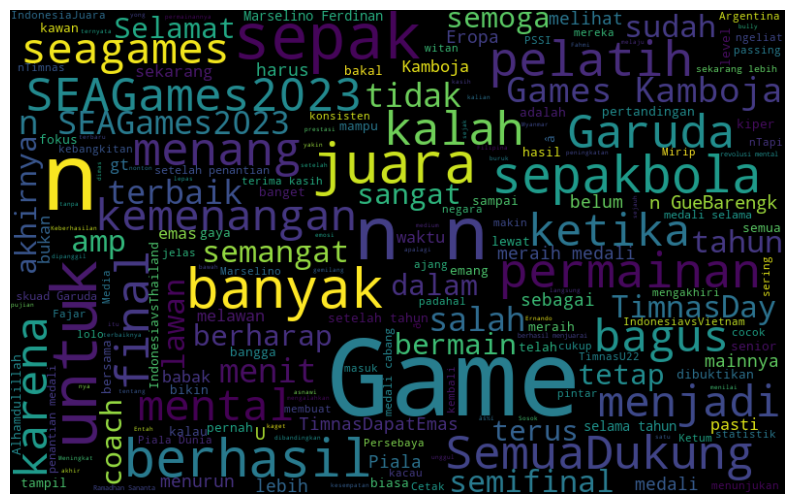

In [146]:
all_words = ' '.join([text for text in train['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

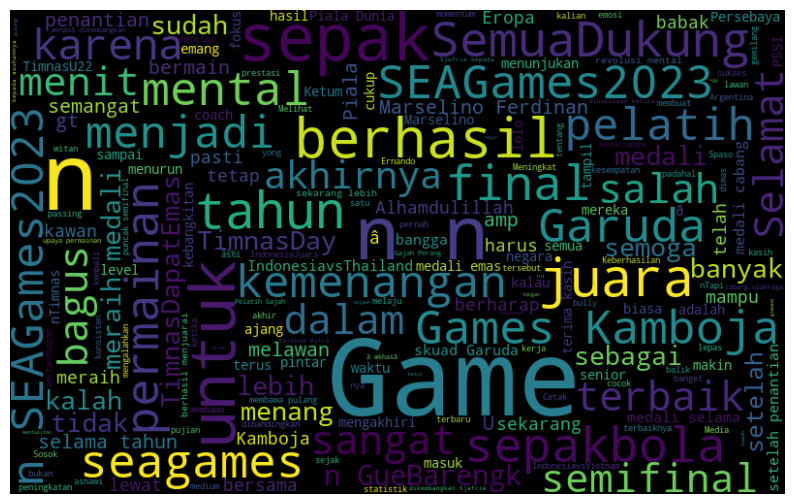

In [147]:
puas = ' '.join([text for text in train['tidy_tweet'][train['Hasil']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(puas)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

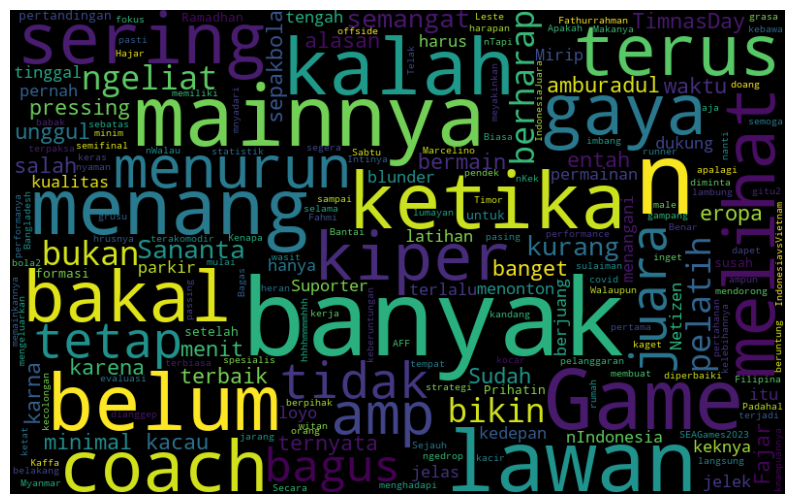

In [148]:
tidak_puas= ' '.join([text for text in train['tidy_tweet'][train['Hasil']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(tidak_puas)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [151]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(train['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(204, 415)

In [152]:
#TF-IDF

#TF = (number of times term appear in a document)/(Number of terms in dcoument)
#IDF = log(N/n)-N is nummber of documents and n is number of documents a term has appeared in.

#TF-IDF = TF * IDF

#tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2,max_features =1000,stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
#tfidf.shape

In [154]:
train=train.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, train['Hasil'],
                                                    test_size=0.2, random_state=69)

In [155]:
print("X_train_shape : ",X_train.shape)
print("y_train_shape : ",y_train.shape)

X_train_shape :  (163, 415)
y_train_shape :  (163,)


nb classfier

In [156]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

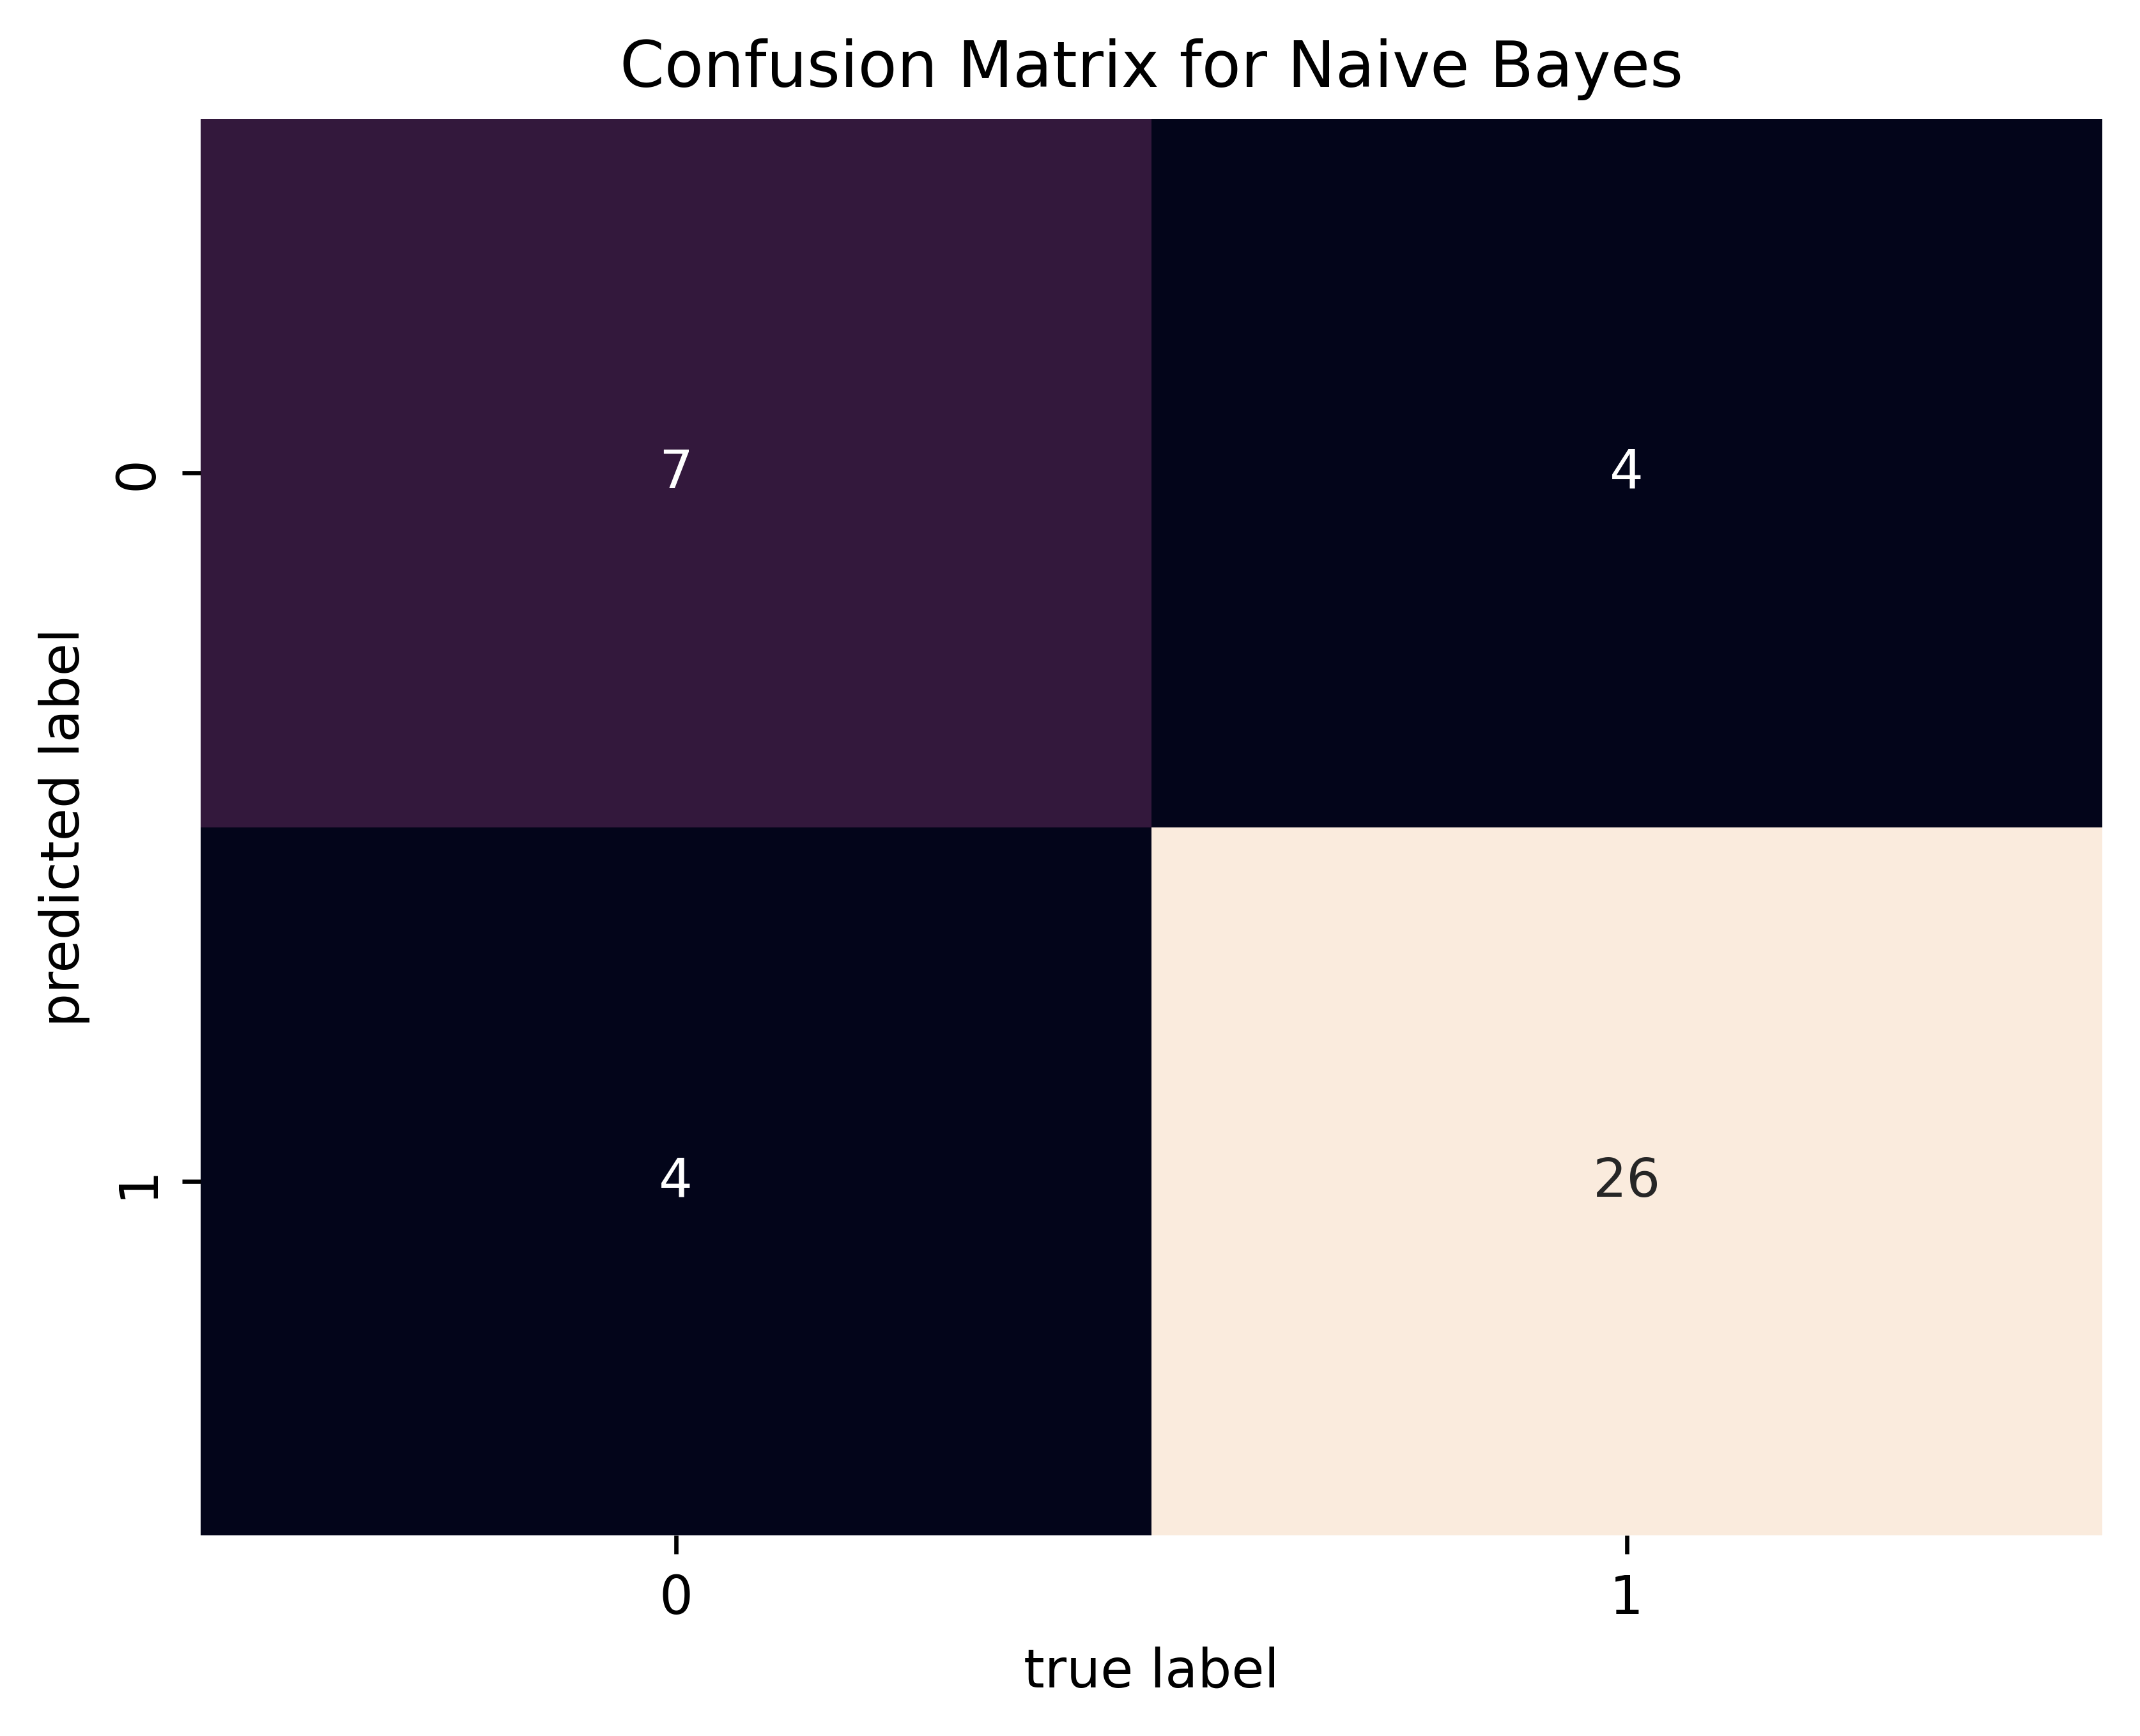

In [157]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [158]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8048780487804879
